# Task 2: Exploratory Data Analysis (EDA)

## Objective
Analyze the data to understand patterns and factors influencing financial inclusion in Ethiopia.

## 1. Setup and Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data_path = '../data/raw/ethiopia_fi_unified_data.csv'
df = pd.read_csv(data_path)

# Preprocessing
obs = df[df['record_type'] == 'observation'].copy()
obs['observation_date'] = pd.to_datetime(obs['observation_date'])
obs['year'] = obs['observation_date'].dt.year

df.head()

,record_type,pillar,indicator,indicator_code,value_numeric,observation_date,source_name,source_url,confidence,category,parent_id,related_indicator,impact_direction,impact_magnitude,lag_months,evidence_basis,notes
0,observation,Access,Account Ownership,ACC_OWN,14.0,2011-01-01,Global Findex,NaN,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,observation,Access,Account Ownership,ACC_OWN,22.0,2014-01-01,Global Findex,NaN,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,observation,Access,Account Ownership,ACC_OWN,35.0,2017-01-01,Global Findex,NaN,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,observation,Access,Account Ownership,ACC_OWN,46.0,2021-01-01,Global Findex,NaN,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,observation,Access,Account Ownership,ACC_OWN,49.0,2024-01-01,Global Findex,NaN,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Access Analysis: Account Ownership Trajectory

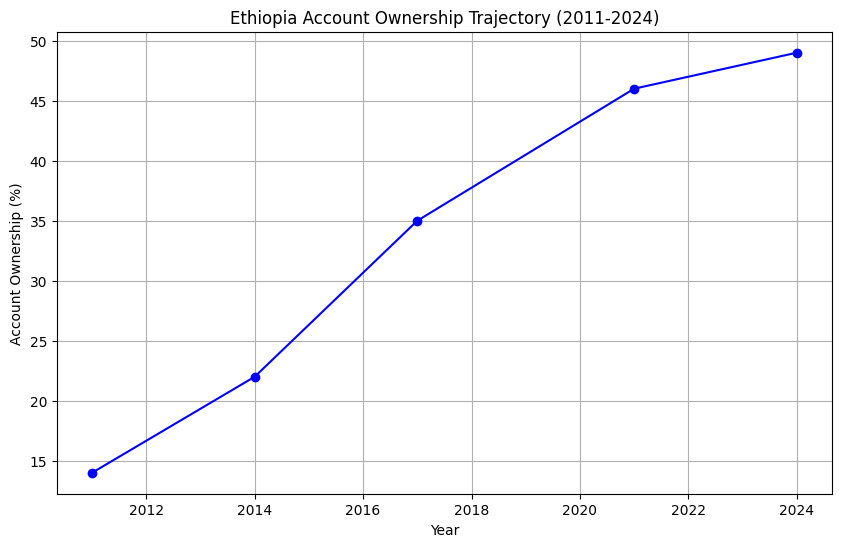

In [2]:
access_obs = obs[obs['indicator_code'] == 'ACC_OWN'].sort_values('year')

plt.figure(figsize=(10, 6))
plt.plot(access_obs['year'], access_obs['value_numeric'], marker='o', linestyle='-', color='b')
plt.title('Ethiopia Account Ownership Trajectory (2011-2024)')
plt.xlabel('Year')
plt.ylabel('Account Ownership (%)')
plt.grid(True)
plt.show()

## 3. Usage Analysis: Digital Payment vs Mobile Money

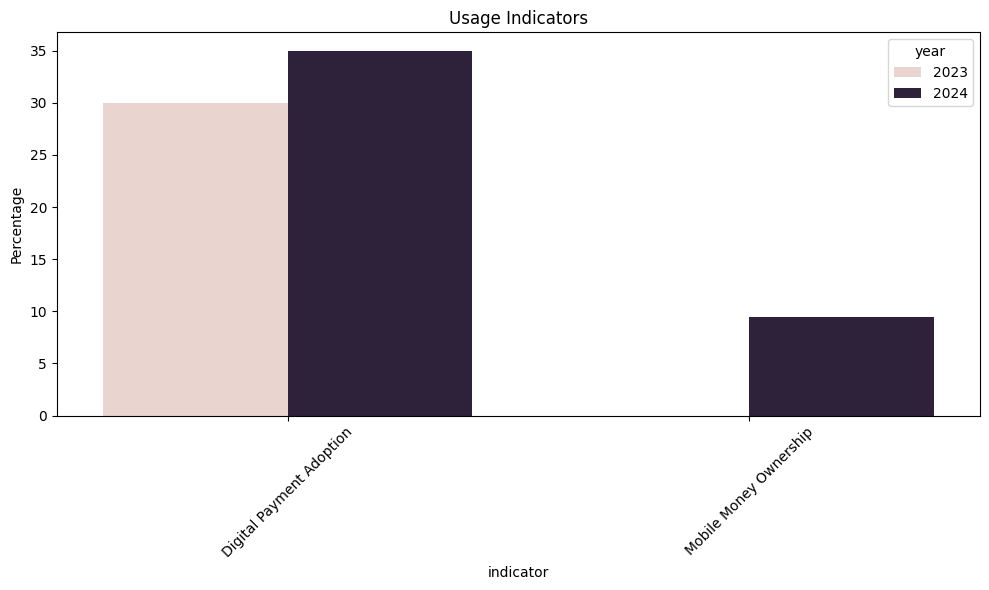

In [3]:
usage_obs = obs[obs['pillar'] == 'Usage'].sort_values('year')

if not usage_obs.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=usage_obs, x='indicator', y='value_numeric', hue='year')
    plt.title('Usage Indicators')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 4. Event Timeline Analysis

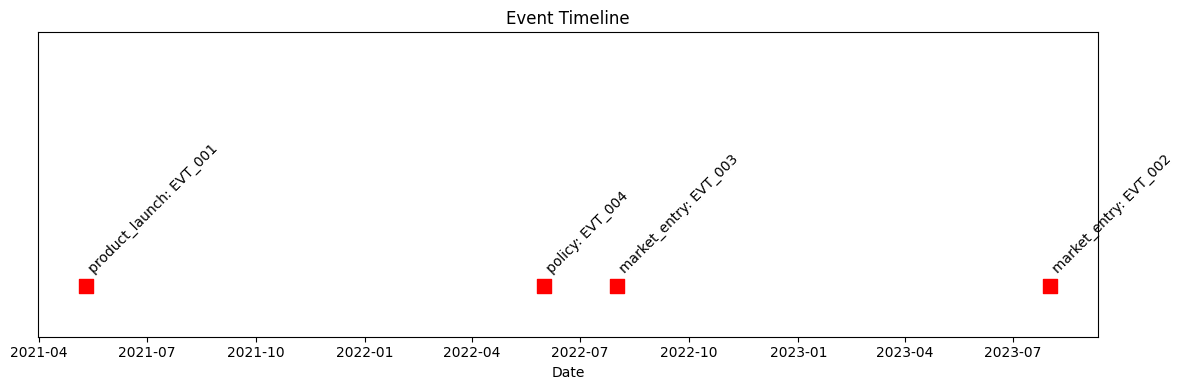

In [4]:
events = df[df['record_type'] == 'event'].copy()
events['observation_date'] = pd.to_datetime(events['observation_date'])
events = events.sort_values('observation_date')

plt.figure(figsize=(12, 4))
plt.scatter(events['observation_date'], [1]*len(events), marker='s', color='r', s=100)

for _, row in events.iterrows():
 plt.text(row['observation_date'], 1.05, row['category'] + ': ' + str(row.get('parent_id', '')), rotation=45)

plt.title('Event Timeline')
plt.yticks([])
plt.xlabel('Date')
plt.ylim(0.8, 2)
plt.tight_layout()
plt.show()

## 5. Key Insights

1. **Account ownership** has grown steadily from 14% in 2011 to 49% in 2024.
2. **Growth Slowdown**: The growth rate appears to have slowed down between 2021 and 2024 (only +3pp) despite new entrants.
3. **Mobile Money**: Ownership is around 9.45% in 2024, significantly lower than overall account ownership.
4. **Market Entries**: Major market entries (Telebirr, M-Pesa) occurred in 2021 and 2023, appearing late in the current timeline.
5. **Digital Payment**: Adoption shows promise with values around 30-35%.